In [1]:
import sys
sys.path.append('/home/g/Desktop/git/nodules/src/')
sys.path.append('/home/g/Desktop/git/nodules/tf/')
sys.path.append('/home/g/Desktop/git/nodules/keras/')
sys.path.append('/home/g/Desktop/git/keras/keras/preprocessing/')
from image3D import ImageDataGenerator

import init
import kerasUtil as ku
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import roc_curve

Using TensorFlow backend.


In [2]:
from keras.models import load_model

In [3]:
cfg = ['/scr/nodules/no4/val/','/scr/nodules/no4/samples/val/']
images, labels = init.loadpng(cfg)
images, labels = ku.cleanData(images,labels)
testImages = ku.to3d(images,2)
testLabels = ku.get3Labels(labels)
print len(testImages)
#testImages = ku.convertArray(testImages)
valgen = ImageDataGenerator(
  featurewise_center=True,
  featurewise_std_normalization=True,
  data_format='channels_first')
valgen.fit(testImages)
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no1-accuracy-051117.h5')
print (np.sum(testLabels[:,0])/testLabels.shape[0])
print model.evaluate_generator(valgen.flow(testImages,testLabels,batch_size=25),7,workers=1)
m1 = model.predict_generator(valgen.flow(testImages,batch_size=25),7,workers=1)
print m1.shape

175
0.36
[0.21178988686629704, 0.94857140098299297]
(175, 3)


In [5]:
testImages = ku.to3d(images,2)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/out/051117/32-no1-accuracy-051117.h5')
print model.evaluate(testImages,testLabels,batch_size=64)
m2 = model.predict_proba(testImages,batch_size=25)

175/175 [==============================] - 0s     
[0.87041635717664445, 0.8571428612300328]
125/175 [====================>.........] - ETA: 0s

In [35]:
print m1

[[  3.29092443e-02   9.67050374e-01   4.03404956e-05]
 [  9.98433888e-01   1.56432041e-03   1.81013627e-06]
 [  2.34803390e-02   9.76497173e-01   2.24559826e-05]
 [  6.00222766e-01   3.51551712e-01   4.82255369e-02]
 [  4.18117374e-01   5.59753835e-01   2.21286993e-02]
 [  1.60655137e-02   9.83928919e-01   5.55318047e-06]
 [  9.78595853e-01   2.10032184e-02   4.00944409e-04]
 [  7.53994938e-03   9.92459357e-01   7.08247796e-07]
 [  3.11026335e-01   6.83821142e-01   5.15256030e-03]
 [  1.24231458e-01   8.72578561e-01   3.18995025e-03]
 [  9.99990940e-01   9.10536164e-06   1.63355399e-10]
 [  9.97167766e-01   2.82683643e-03   5.29648014e-06]
 [  3.15635316e-02   9.68398392e-01   3.80951642e-05]
 [  8.57201517e-02   9.13766921e-01   5.12915663e-04]
 [  9.99965549e-01   3.44975560e-05   1.51424662e-09]
 [  1.14554632e-02   9.88540828e-01   3.74699744e-06]
 [  8.23533386e-02   9.17041123e-01   6.05503097e-04]
 [  1.57666549e-01   8.40721309e-01   1.61221158e-03]
 [  4.46819440e-02   9.55184

In [22]:
#print m2

In [6]:
testImages = ku.to3d(images,1)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x48x48_no4_test_b1.h5')
print model.evaluate(testImages,testLabels,batch_size=64)
m3 = model.predict_proba(testImages,batch_size=32)

214/214 [==============================] - 0s     
[0.37138833398016813, 0.85981308522625499]
214/214 [==============================] - 0s     


In [7]:
testImages = ku.to3d(images,1)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x48x48_no4_test_b2.h5')
print model.evaluate(testImages,testLabels,batch_size=64)
m4 = model.predict_proba(testImages,batch_size=32)

214/214 [==============================] - 0s     


In [8]:
testImages = ku.to3d(images,2)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x32x32_no4_test_b1.h5')
print model.evaluate(testImages,testLabels,batch_size=64)
m5 = model.predict_proba(testImages,batch_size=32)

160/214 [=====================>........] - ETA: 0s

In [9]:
testImages = ku.to3d(images,2)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x32x32_no4_test_b2.h5')
print model.evaluate(testImages,testLabels,batch_size=64)
m6 = model.predict_proba(testImages,batch_size=32)

160/214 [=====================>........] - ETA: 0s

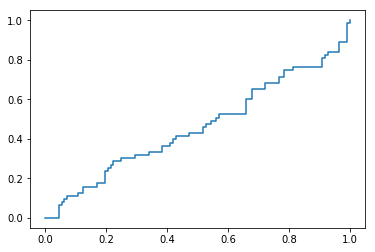

In [6]:
#testLabels = np.asarray(testLabels)
fpr, tpr, _ = roc_curve(testLabels[:,0],m1[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

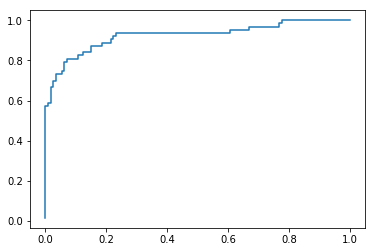

In [7]:
testLabels = np.asarray(testLabels)
fpr, tpr, _ = roc_curve(testLabels[:,0],m2[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

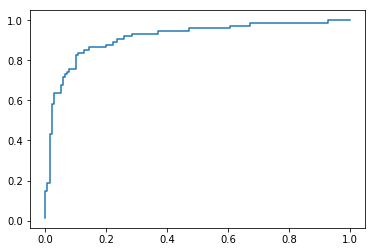

In [12]:
testLabels = np.asarray(testLabels)
fpr, tpr, _ = roc_curve(testLabels[:,0],m3[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

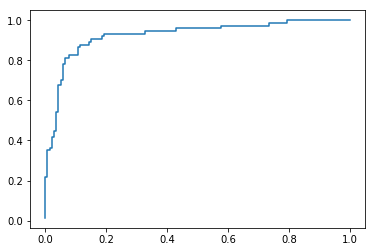

In [13]:
fpr, tpr, _ = roc_curve(testLabels[:,0],m4[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

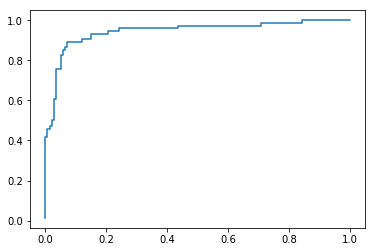

In [14]:
fpr, tpr, _ = roc_curve(testLabels[:,0],m5[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

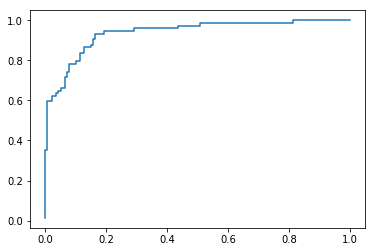

In [15]:
fpr, tpr, _ = roc_curve(testLabels[:,0],m6[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

In [16]:
m = m1[:,0]+m2[:,0]+m3[:,0]+m4[:,0]+m5[:,0]+m6[:,0]
m = m/6.

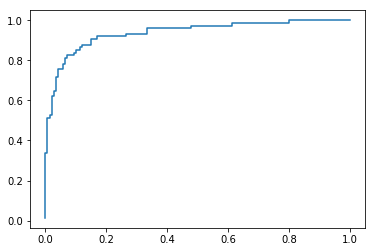

In [17]:
testLabels = np.asarray(testLabels)
fpr, tpr, _ = roc_curve(testLabels[:,0],m)
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

In [18]:
cfg = ['/scr/nodules/no4/bin5/','/scr/nodules/no4/bin5/']
imagesB, labelsB = init.loadData(cfg)
imagesB, labelsB = ku.cleanData(imagesB,labelsB)
testLabelsB = ku.get3Labels(labelsB)

LOADING DATA...


In [19]:
testImages = ku.to3d(imagesB,0)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x64x64_no4_test_b1.h5')
print model.evaluate(testImages,testLabelsB,batch_size=64)
m1b = model.predict_proba(testImages,batch_size=64)

248/248 [==============================] - 0s     
[0.34669824088773421, 0.85080646699474705]
248/248 [==============================] - 0s     


In [20]:
testImages = ku.to3d(imagesB,0)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x64x64_no4_test_b2.h5')
print model.evaluate(testImages,testLabelsB,batch_size=64)
m2b = model.predict_proba(testImages,batch_size=64)

248/248 [==============================] - 0s     
[0.31608350526901985, 0.89112904187171693]
248/248 [==============================] - 0s     


In [21]:
testImages = ku.to3d(imagesB,1)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x48x48_no4_test_b1.h5')
print model.evaluate(testImages,testLabelsB,batch_size=64)
m3b = model.predict_proba(testImages,batch_size=64)

248/248 [==============================] - 0s     
[0.29470837404651029, 0.8911290399489864]
248/248 [==============================] - 0s     


In [22]:
testImages = ku.to3d(imagesB,1)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x48x48_no4_test_b2.h5')
print model.evaluate(testImages,testLabelsB,batch_size=64)
m4b = model.predict_proba(testImages,batch_size=64)

248/248 [==============================] - 0s     
[0.38988285487697971, 0.85483870967741937]
248/248 [==============================] - 0s     


In [23]:
testImages = ku.to3d(imagesB,2)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x32x32_no4_test_b1.h5')
print model.evaluate(testImages,testLabelsB,batch_size=64)
m5b = model.predict_proba(testImages,batch_size=64)

248/248 [==============================] - 0s     
[0.28010707324550999, 0.90725807412978143]
192/248 [======================>.......] - ETA: 0s

In [24]:
testImages = ku.to3d(imagesB,2)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/16x32x32_no4_test_b2.h5')
print model.evaluate(testImages,testLabelsB,batch_size=64)
m6b = model.predict_proba(testImages,batch_size=64)

192/248 [======================>.......] - ETA: 0s

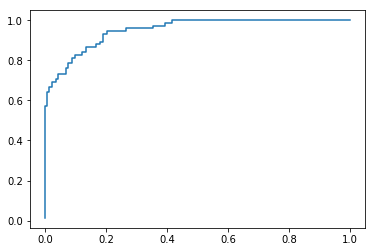

In [26]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m1b[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

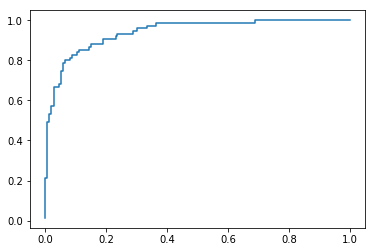

In [27]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m2b[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

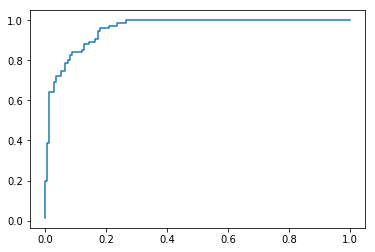

In [28]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m3b[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

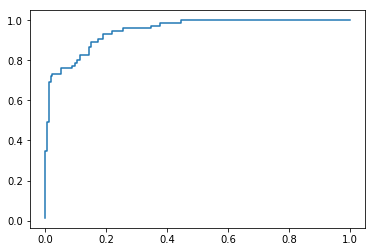

In [29]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m4b[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

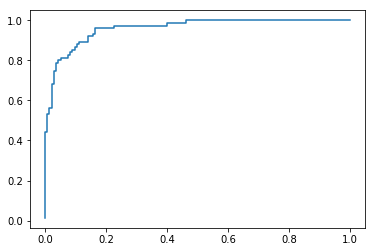

In [30]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m5b[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

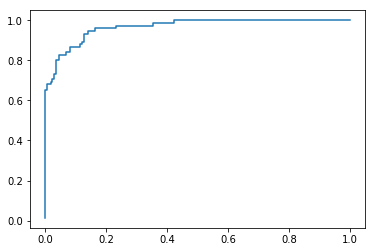

In [31]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m6b[:,0])
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

In [32]:
m = m2b[:,0]+m3b[:,0]+m5b[:,0]
m = m/3.

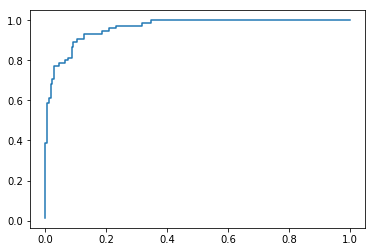

In [34]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m)
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

In [35]:
m = m1b[:,0]+m2b[:,0]+m3b[:,0]+m4b[:,0]+m5b[:,0]+m6b[:,0]
m = m/6.

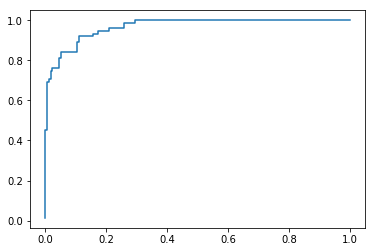

In [36]:
fpr, tpr, _ = roc_curve(testLabelsB[:,0],m)
plt.plot(fpr,tpr)
plt.show()  
plt.clf()

In [5]:
testImages = ku.to3d(images,2)
testImages = ku.convertArray(testImages)
model = load_model('/home/g/Desktop/git/nodules/out/32-no13-accuracy-043017.h5')
print model.evaluate(testImages,testLabels,batch_size=64)
m6 = model.predict_proba(testImages,batch_size=32)

160/214 [=====================>........] - ETA: 0s